<a href="https://colab.research.google.com/github/arvishcdoshi/CNN-Samples/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

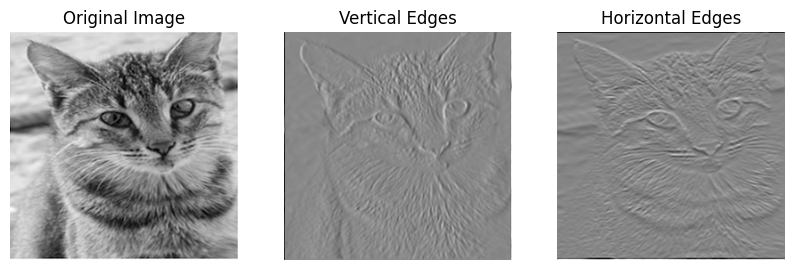

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("/catsample.jpg").convert("L")  # Load as grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Convert to float32 and normalize

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define vertical and horizontal edge detection filters (Sobel-like)
vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]], dtype=np.float32)

horizontal_filter = np.array([[1,  1,  1],
                              [0,  0,  0],
                              [-1, -1, -1]], dtype=np.float32)

# Reshape filters for TensorFlow (H, W, in_channels, out_channels)
vertical_filter = vertical_filter.reshape(3, 3, 1, 1)
horizontal_filter = horizontal_filter.reshape(3, 3, 1, 1)

# Apply convolution
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1, 1, 1, 1], padding="SAME")
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1, 1, 1, 1], padding="SAME")

# Convert tensors to numpy for visualization
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()

# Plot original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap="gray")
plt.title("Vertical Edges")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap="gray")
plt.title("Horizontal Edges")
plt.axis("off")

plt.show()

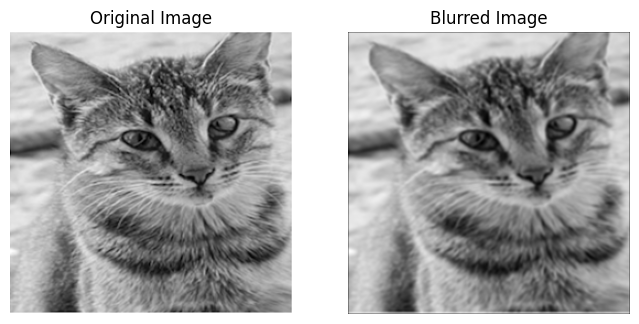

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("/catsample.jpg").convert("L")  # Convert to grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Normalize to range [0,1]

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define a 3x3 blurring filter (averaging kernel)
blur_filter = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

# Reshape the filter for TensorFlow (H, W, in_channels, out_channels)
blur_filter = blur_filter.reshape(3, 3, 1, 1)

# Apply convolution for blurring
blurred_image = tf.nn.conv2d(image, blur_filter, strides=[1, 1, 1, 1], padding="SAME")

# Convert tensor to numpy for visualization
blurred_image = blurred_image.numpy().squeeze()

# Plot original and blurred images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.show()

In [1]:
# By default, when we visualize an image using imshow(), values are mapped in a range:

# Negative values appear dark (black)
# Zero values appear mid-gray
# Positive values appear bright (white)

# Correlation (correlate2d) - Kernel is NOT flipped
# Convolution (convolve2d) - Kernel is flipped

# Modes - same, full and valid
# If you want output size to match the input (add padding), use same
# If you do not want padding (output will be smaller), use valid
# If you want the entire range of the convolution (output will be bigger), use full

# For 9x9 input ->
# same => output = 9x9
# valid => output = 7x7
# full => output = 11x11

# Correlate with Mode "same" - Vertical Edge Detection

Correlation Result -> 

[[    0.   510.   510.   255.   255.  -255.  -765.  -510.     0.]
 [    0.   255.   255.   765.   765.  -765. -1020.  -255.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.   765.   765.  -765.  -765.     0.     0.]
 [    0.     0.     0.   255.   255.  -255.  -255.     0.     0.]] 



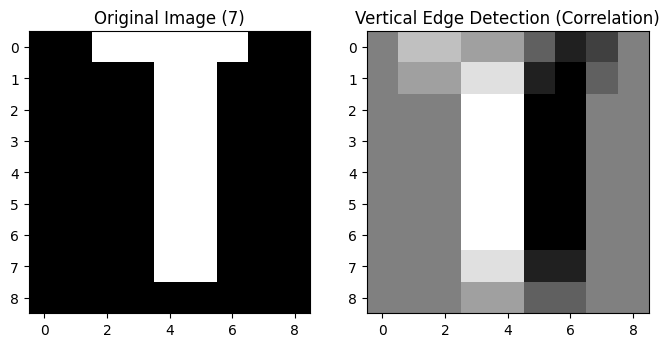

In [2]:
# Correlate - without flipping kernel
# Mode same - Output same size (one pixel padding added)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation)')

plt.show()

Correlation Result -> 

[[    0.   765.   765.     0.     0.     0.  -765.  -765.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.   765.   765.   255.   255.  -255. -1020.  -765.     0.]
 [    0.   255.   255.   765.   765.  -765. -1020.  -255.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.   765.   765.  -765.  -765.     0.     0.]
 [    0.     0.     0.   255.   255.  -255.  -255.     0.     0.]] 



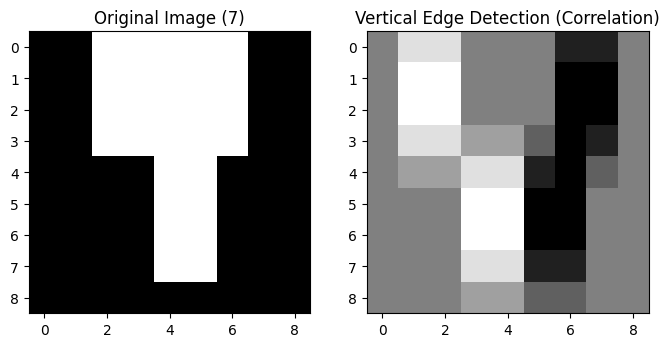

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation)')

plt.show()

Correlation Result -> 

[[    0.   765.   765.     0.     0.     0.  -765.  -765.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.   765.   765.     0.     0.     0.  -765.  -765.     0.]] 



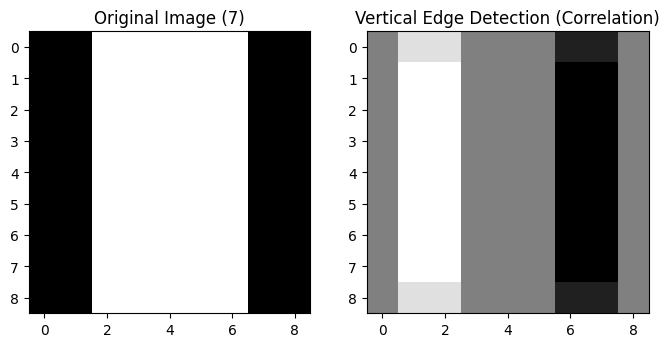

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation)')

plt.show()

# Correlate with Mode "valid" - Vertical Edge Detection

Correlation Result -> 

[[  255.   255.   765.   765.  -765. -1020.  -255.]
 [    0.     0.  1020.  1020. -1020. -1020.     0.]
 [    0.     0.  1020.  1020. -1020. -1020.     0.]
 [    0.     0.  1020.  1020. -1020. -1020.     0.]
 [    0.     0.  1020.  1020. -1020. -1020.     0.]
 [    0.     0.  1020.  1020. -1020. -1020.     0.]
 [    0.     0.   765.   765.  -765.  -765.     0.]] 



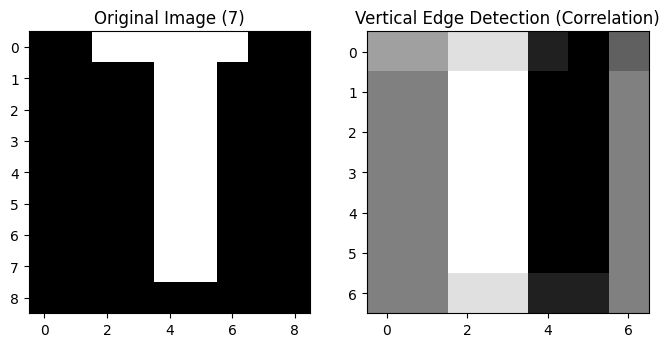

In [5]:
# Correlate - without flipping kernel
# Mode valid - Smaller Output

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='valid')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation)')

plt.show()

# Correlate with Mode "full" - Vertical Edge Detection

Correlation Result -> 

[[    0.     0.   255.   255.     0.     0.     0.  -255.  -255.     0.
      0.]
 [    0.     0.   510.   510.   255.   255.  -255.  -765.  -510.     0.
      0.]
 [    0.     0.   255.   255.   765.   765.  -765. -1020.  -255.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.   765.   765.  -765.  -765.     0.     0.
      0.]
 [    0.     0.     0.     0.   255.   255.  -255.  -255.     0.     0.
      0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.]] 



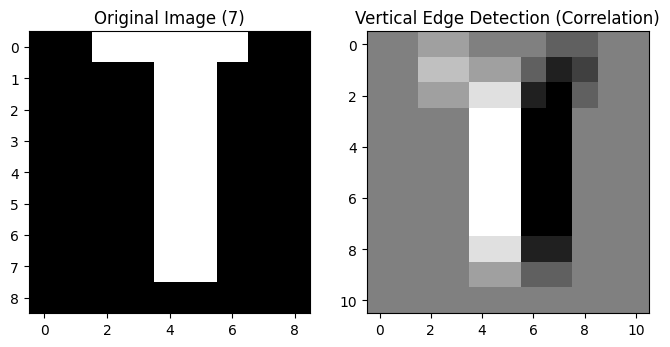

In [6]:
# Correlate - without flipping kernel
# Mode full - Bigger Output

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='full')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation)')

plt.show()

# Convolve with Mode "same" - Vertical Edge Detection

Convolution Result -> 

[[    0.  -510.  -510.  -255.  -255.   255.   765.   510.     0.]
 [    0.  -255.  -255.  -765.  -765.   765.  1020.   255.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0.  -765.  -765.   765.   765.     0.     0.]
 [    0.     0.     0.  -255.  -255.   255.   255.     0.     0.]] 



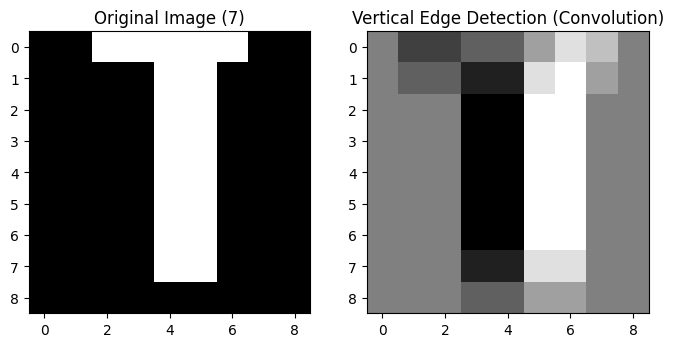

In [7]:
# Convolve - flipping kernel
# Mode same - Output same size (one pixel padding added)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import convolve2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

conv_result = convolve2d(image, vertical_kernel, mode='same')

print("Convolution Result -> \n")
print(conv_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(conv_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Convolution)')

plt.show()

# Convolve with Mode "valid" - Vertical Edge Detection

Convolution Result -> 

[[ -255.  -255.  -765.  -765.   765.  1020.   255.]
 [    0.     0. -1020. -1020.  1020.  1020.     0.]
 [    0.     0. -1020. -1020.  1020.  1020.     0.]
 [    0.     0. -1020. -1020.  1020.  1020.     0.]
 [    0.     0. -1020. -1020.  1020.  1020.     0.]
 [    0.     0. -1020. -1020.  1020.  1020.     0.]
 [    0.     0.  -765.  -765.   765.   765.     0.]] 



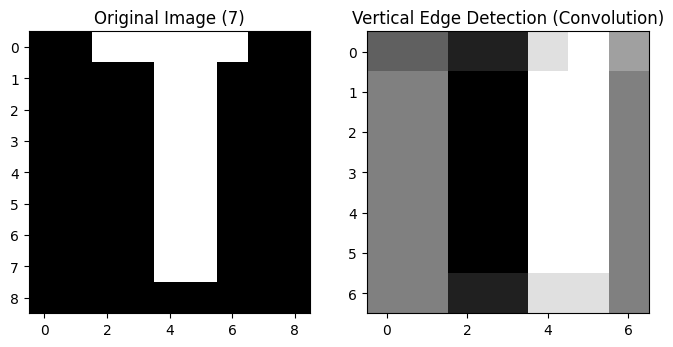

In [8]:
# Convolve - flipping kernel
# Mode valid - Smaller Output

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import convolve2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

conv_result = convolve2d(image, vertical_kernel, mode='valid')

print("Convolution Result -> \n")
print(conv_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(conv_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Convolution)')

plt.show()

# Convolve with Mode "full" - Vertical Edge Detection

Convolution Result -> 

[[    0.     0.  -255.  -255.     0.     0.     0.   255.   255.     0.
      0.]
 [    0.     0.  -510.  -510.  -255.  -255.   255.   765.   510.     0.
      0.]
 [    0.     0.  -255.  -255.  -765.  -765.   765.  1020.   255.     0.
      0.]
 [    0.     0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.
      0.]
 [    0.     0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.
      0.]
 [    0.     0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.
      0.]
 [    0.     0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.
      0.]
 [    0.     0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  -765.  -765.   765.   765.     0.     0.
      0.]
 [    0.     0.     0.     0.  -255.  -255.   255.   255.     0.     0.
      0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.]] 



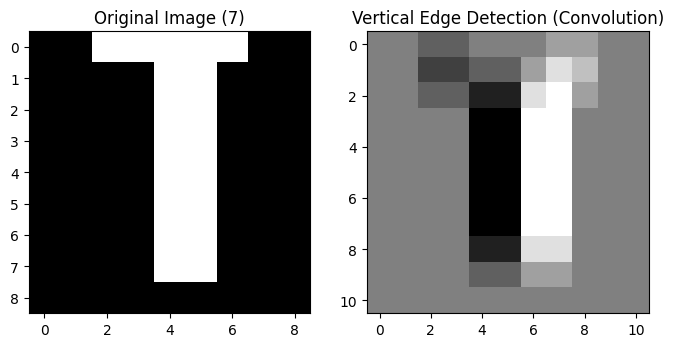

In [9]:
# Convolve - flipping kernel
# Mode full - Bigger Output

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import convolve2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

conv_result = convolve2d(image, vertical_kernel, mode='full')

print("Convolution Result -> \n")
print(conv_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(conv_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Convolution)')

plt.show()

# Correlate with Mode "same" - Horizontal Edge Detection

Correlation Result -> 

[[   0.    0.    0.  255.  765.  765.  255.    0.    0.]
 [   0. -255. -765. -765. -255. -255. -510. -255.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -255. -765. -765. -255.    0.    0.]
 [   0.    0.    0. -255. -765. -765. -255.    0.    0.]] 



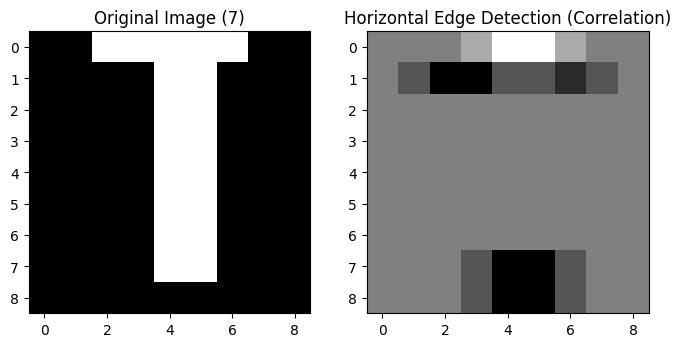

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, -2, -1],
    [0 ,  0,  0],
    [1 ,  2,  1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Horizontal Edge Detection (Correlation)')

plt.show()

# Correlate with Mode "same" - Diagonal Detection

Correlation Result -> 

[[ 255.    0.    0.    0.    0.    0. -255. -255.  765.]
 [ 255.    0.    0.    0.    0. -255. -510. 1020. -765.]
 [   0.    0.    0.    0. -255. -510. 1530. -510. -255.]
 [   0.    0.    0. -255. -510. 1530. -510. -255.    0.]
 [   0.    0. -255. -510. 1530. -510. -255.    0.    0.]
 [   0. -255. -510. 1530. -510. -255.    0.    0.    0.]
 [-255. -510. 1530. -510. -255.    0.    0.    0.    0.]
 [-765. 1020. -510. -255.    0.    0.    0.    0.  255.]
 [ 765. -255. -255.    0.    0.    0.    0.    0.  255.]] 



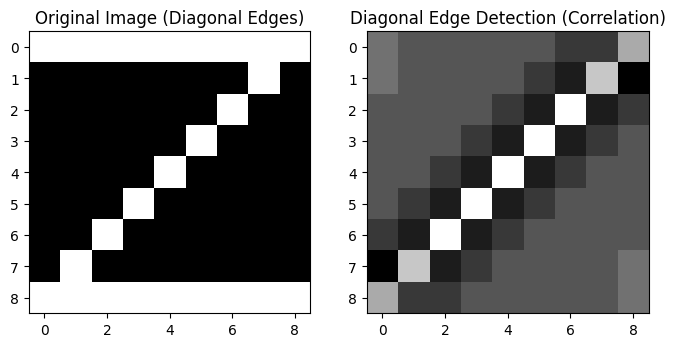

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Step 1: Create a binary image with diagonal edges (Z shape)
image = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0, 0, 0, 0, 0, 0, 0, 255, 0],
    [0, 0, 0, 0, 0, 0, 255, 0, 0],
    [0, 0, 0, 0, 0, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 0, 0, 0, 0, 0],
    [255, 255, 255, 255, 255, 255, 255, 255, 255]
], dtype=np.float32)

# Step 2: Define a diagonal edge detection kernel
# Detects edges along / diagonal direction
diagonal_kernel = np.array([
    [-1, -1,  2],
    [-1,  2, -1],
    [ 2, -1, -1]
], dtype=np.float32)

corr_result = correlate2d(image, diagonal_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (Diagonal Edges)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Diagonal Edge Detection (Correlation)')

plt.show()

Correlation Result -> 

[[ 765. -255. -255.    0.    0.    0.    0.    0.  255.]
 [-765. 1020. -510. -255.    0.    0.    0.    0.  255.]
 [-255. -510. 1530. -510. -255.    0.    0.    0.    0.]
 [   0. -255. -510. 1530. -510. -255.    0.    0.    0.]
 [   0.    0. -255. -510. 1530. -510. -255.    0.    0.]
 [   0.    0.    0. -255. -510. 1530. -510. -255.    0.]
 [   0.    0.    0.    0. -255. -510. 1530. -510. -255.]
 [ 255.    0.    0.    0.    0. -255. -510. 1020. -765.]
 [ 255.    0.    0.    0.    0.    0. -255. -255.  765.]] 



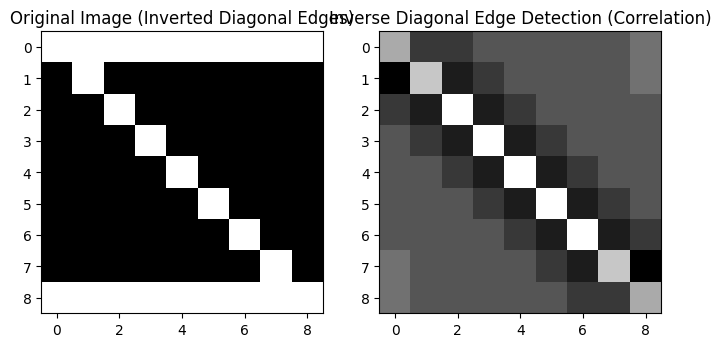

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Step 1: Create a binary image with diagonal edges forming an inverted "Z" shape
image = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0, 255, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 255, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 255, 0],
    [255, 255, 255, 255, 255, 255, 255, 255, 255]
], dtype=np.float32)

# Step 2: Define a diagonal edge detection kernel
# Detects edges along / diagonal direction
inverse_diagonal_kernel = np.array([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
], dtype=np.float32)

corr_result = correlate2d(image, inverse_diagonal_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (Inverted Diagonal Edges)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Inverse Diagonal Edge Detection (Correlation)')

plt.show()

# Blur Effect on Image

Correlation Result -> 

[[ 61.2       71.399994 101.99999  101.99999  112.2      132.59999
  132.6      112.2      102.       101.99999   71.399994  61.2     ]
 [ 81.6      101.99999  142.79999  142.79999  163.2      183.59999
  183.6      163.2      142.8      142.79999  101.99999   81.6     ]
 [101.99999  122.399994 163.19998  152.99998  173.4      183.59999
  183.6      173.4      153.       163.19998  122.399994 102.      ]
 [ 91.799995 102.       142.79999  132.59999  163.2      173.39998
  173.4      163.2      132.6      142.79999  102.        91.8     ]
 [ 91.799995 102.       142.79999  122.4      152.99998  152.99998
  152.99998  152.99998  122.399994 142.79999  102.        91.8     ]
 [101.99999  112.200005 152.99998  132.6      163.2      152.99998
  153.       163.2      132.6      152.99998  112.200005 102.      ]
 [101.99999  102.       132.59999  101.99999  122.399994 102.
  102.       122.399994 101.99999  132.59999  102.       102.      ]
 [101.99999  112.2      142.7

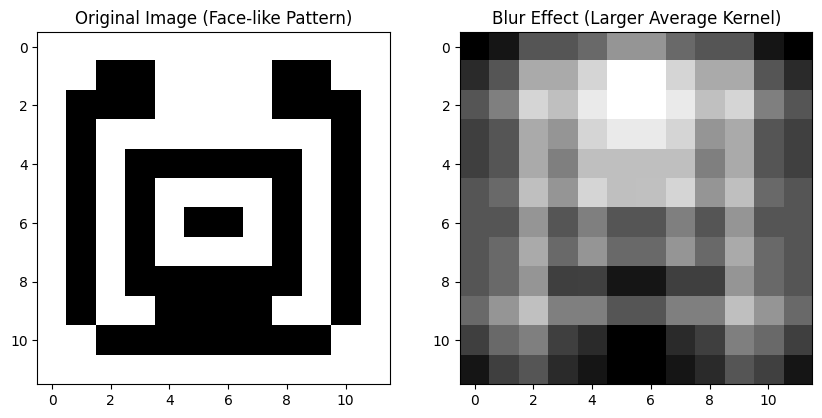

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Step 1: Create a larger binary image with a simple face-like pattern
image = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 0, 0, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 255],
    [255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 0, 255],
    [255, 0, 255, 255, 0, 0, 0, 0, 255, 255, 0, 255],
    [255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
], dtype=np.float32)

# Step 2: Define a larger blur (average) kernel
blur_kernel = np.ones((5, 5), dtype=np.float32) / 25

corr_result = correlate2d(image, blur_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (Face-like Pattern)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Blur Effect (Larger Average Kernel)')

plt.show()

Correlation Result -> 

[[ 52.04082   72.85715   93.67346  114.489784 114.489784 124.89794
  135.3061   145.71428  145.71428  145.71428  145.71428  145.71428
  145.71428  145.71428  145.71428  130.10204  114.489784 104.081635
  104.08162   83.265305  62.448982  41.632652]
 [ 62.448986  83.265305 104.08163  124.89795  119.69386  130.10202
  140.5102   156.12245  161.32654  166.53062  171.7347   176.93878
  182.14287  176.93878  171.7347   150.91837  135.30612  119.69388
  119.693855  93.67346   72.85714   52.040817]
 [ 72.85715   98.87754  124.89795  150.91837  145.71428  156.12244
  166.53061  187.34695  192.55104  197.75513  202.9592   208.16328
  218.57146  208.16328  202.9592   176.93878  161.32654  140.51021
  140.5102   109.285706  88.46938   62.448982]
 [ 83.265305 114.48978  140.5102   166.53061  161.32652  171.73468
  182.14287  202.9592   202.95921  208.16328  213.36736  213.36737
  228.97963  213.36737  213.36737  187.34695  176.9388   156.12245
  161.32652  124.89795  104.08

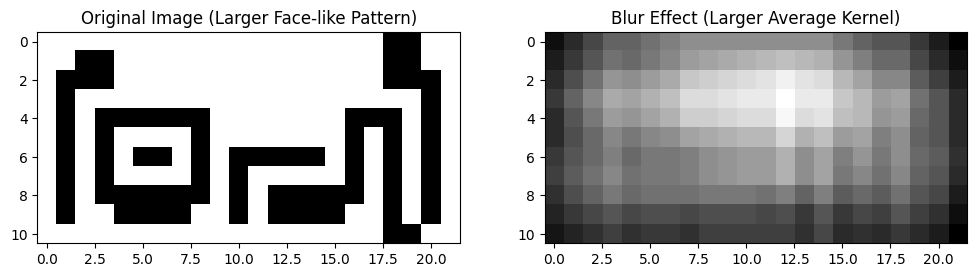

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Step 1: Create a larger binary image with a detailed face-like pattern
image = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 255, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255],
    [255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 0, 255, 255, 255, 255, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 255, 0, 0, 0, 0, 255, 255, 0, 255, 0, 0, 0, 0, 255, 255, 0, 255, 0, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255]
], dtype=np.float32)

# Step 2: Define a larger blur (average) kernel
blur_kernel = np.ones((7, 7), dtype=np.float32) / 49

corr_result = correlate2d(image, blur_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (Larger Face-like Pattern)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Blur Effect (Larger Average Kernel)')

plt.show()

Blurred Image -> 

[[ 52.04082   72.85715   93.67346  114.489784 114.489784 124.89794
  135.3061   145.71428  145.71428  145.71428  145.71428  145.71428
  145.71428  145.71428  145.71428  130.10204  114.489784 104.081635
  104.08162   83.265305  62.448982  41.632652]
 [ 62.448986  83.265305 104.08163  124.89795  119.69386  130.10202
  140.5102   156.12245  161.32654  166.53062  171.7347   176.93878
  182.14287  176.93878  171.7347   150.91837  135.30612  119.69388
  119.693855  93.67346   72.85714   52.040817]
 [ 72.85715   98.87754  124.89795  150.91837  145.71428  156.12244
  166.53061  187.34695  192.55104  197.75513  202.9592   208.16328
  218.57146  208.16328  202.9592   176.93878  161.32654  140.51021
  140.5102   109.285706  88.46938   62.448982]
 [ 83.265305 114.48978  140.5102   166.53061  161.32652  171.73468
  182.14287  202.9592   202.95921  208.16328  213.36736  213.36737
  228.97963  213.36737  213.36737  187.34695  176.9388   156.12245
  161.32652  124.89795  104.08163  

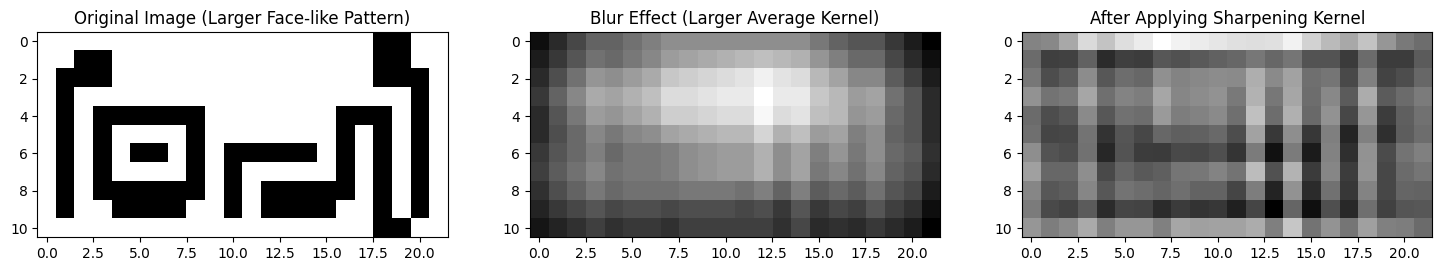

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Step 1: Create a larger binary image with a detailed face-like pattern
image = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 255, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255],
    [255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 0, 255, 255, 255, 255, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 255, 0, 0, 0, 0, 255, 255, 0, 255, 0, 0, 0, 0, 255, 255, 0, 255, 0, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255]
], dtype=np.float32)

# Step 2: Define a larger blur (average) kernel
blur_kernel = np.ones((7, 7), dtype=np.float32) / 49

# Apply blur
blurred_image = correlate2d(image, blur_kernel, mode='same')

# Step 3: Define a sharpening kernel
sharpen_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
], dtype=np.float32)

# Apply sharpening
sharpened_image = correlate2d(blurred_image, sharpen_kernel, mode='same')

print("Blurred Image -> \n")
print(blurred_image, "\n")

print("Sharpened Image -> \n")
print(sharpened_image, "\n")

# Step 4: Visualize Results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (Larger Face-like Pattern)')

axs[1].imshow(blurred_image, cmap='gray')
axs[1].set_title('Blur Effect (Larger Average Kernel)')

axs[2].imshow(sharpened_image, cmap='gray')
axs[2].set_title('After Applying Sharpening Kernel')

plt.show()